# Heart failure predection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data set

In [3]:
data = pd.read_csv('C:/Users/Swapnil/Desktop/Datasets/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [9]:
data.shape

(299, 13)

In [11]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [12]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

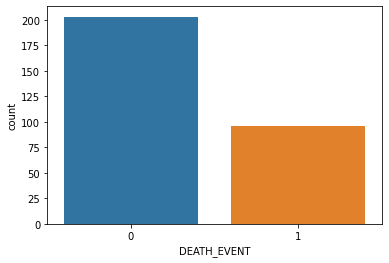

In [14]:
sns.countplot(x=data["DEATH_EVENT"])


here 0 = survived and 1 = not survived

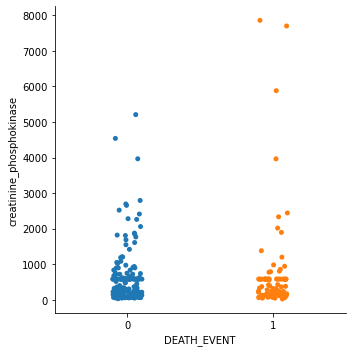

In [29]:
sns.catplot(data=data, x="DEATH_EVENT", y="creatinine_phosphokinase")

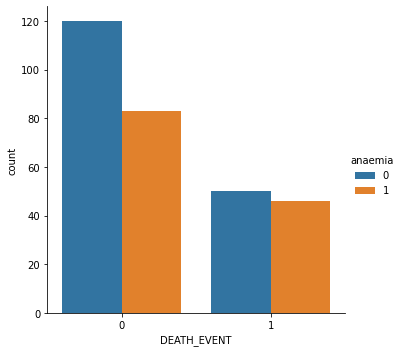

In [33]:
sns.catplot(x='DEATH_EVENT',hue='anaemia',data=data,kind="count")

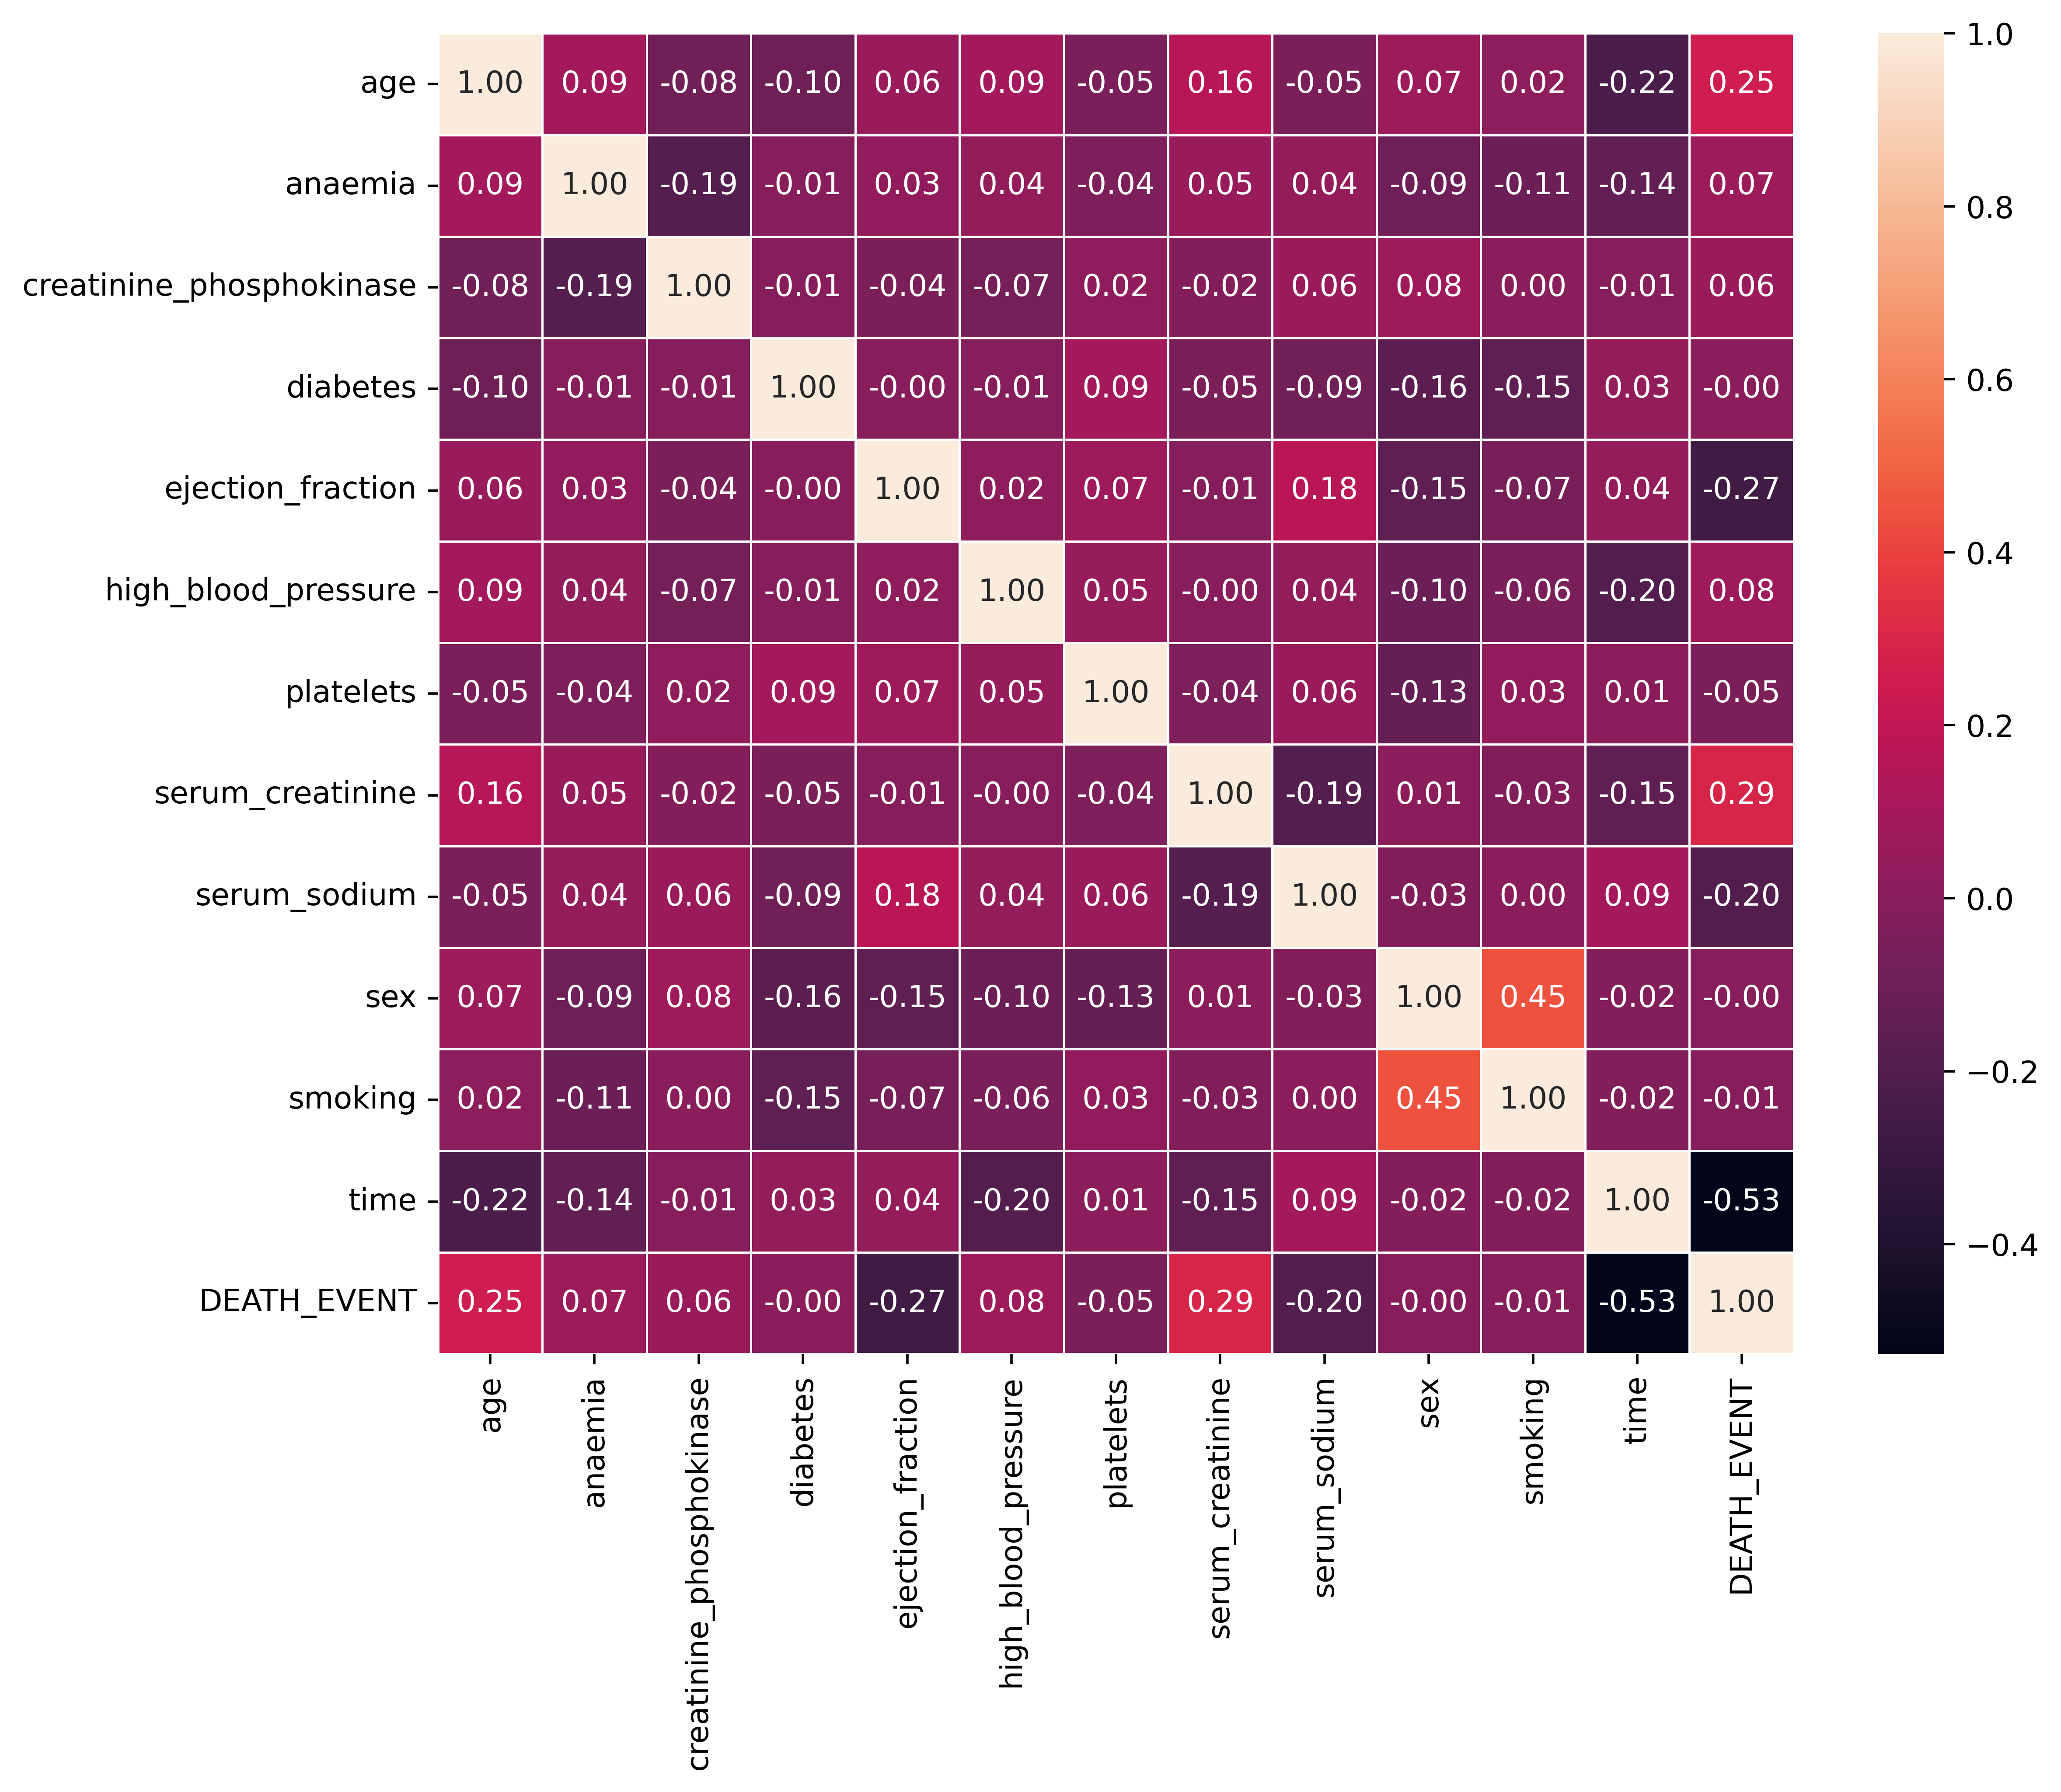

In [34]:
corr = data.corr(method = 'pearson')

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

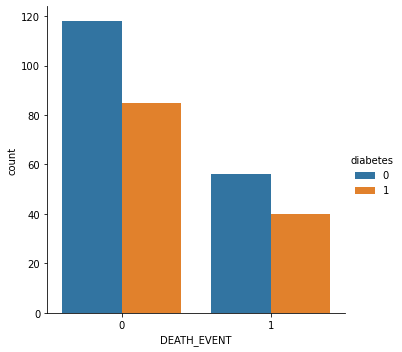

In [35]:
sns.catplot(x='DEATH_EVENT',hue='diabetes',data=data,kind="count")

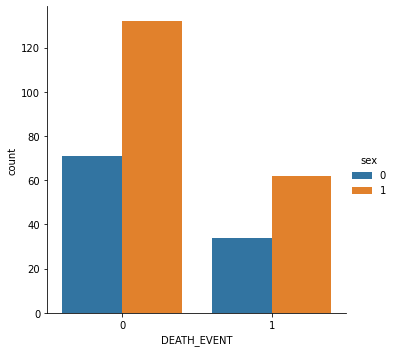

In [36]:
sns.catplot(x='DEATH_EVENT',hue='sex',data=data,kind="count")

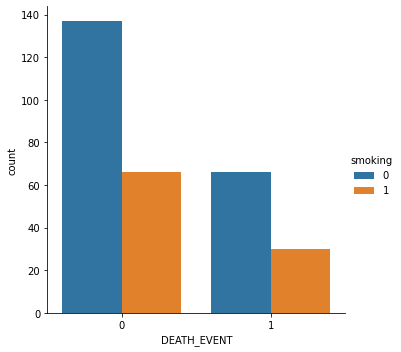

In [37]:
sns.catplot(x='DEATH_EVENT',hue='smoking',data=data,kind="count")

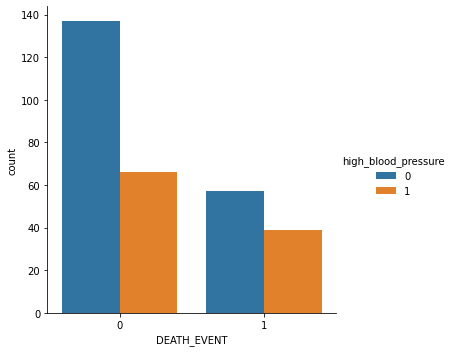

In [38]:
sns.catplot(x='DEATH_EVENT',hue='high_blood_pressure',data=data,kind="count")

from above we can conclude that
-having high blood pressure can cause more likely to have a heart failure
-having anemia can cause more likely to have a heart failure
-doing smoking can cause more likely to have a heart failure
-more no of heart failure cases occur in male as compare to female

In [41]:
feature = data.columns
feature

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [43]:
feature = feature.drop(['DEATH_EVENT'])
feature

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [54]:
X = data[feature]

In [55]:
y = data['DEATH_EVENT']

# Splitting the data inti test train parts

In [57]:
from sklearn.model_selection import train_test_split
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   )
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())
  

X_train : 
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
169  70.0        0                       835         0                 35   
269  40.0        0                       582         1                 35   
113  70.0        1                       143         0                 60   
64   45.0        0                       582         0                 80   
17   45.0        0                       582         0                 14   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
169                    1  305000.00              0.80           133    0   
269                    0  222000.00              1.00           132    1   
113                    0  351000.00              1.30           137    0   
64                     0  263358.03              1.18           137    0   
17                     0  166000.00              0.80           127    1   

     smoking  time  
169        0   145  
269        0   244  
113   

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [60]:
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)
  
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 84.0


# ROC Curve

In [69]:
from sklearn.metrics import roc_auc_score
# lets measure the logistic model AUC
logistic_roc_auc = roc_auc_score(y_test, clf.predict(X_test)) # on test data
logistic_roc_auc
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

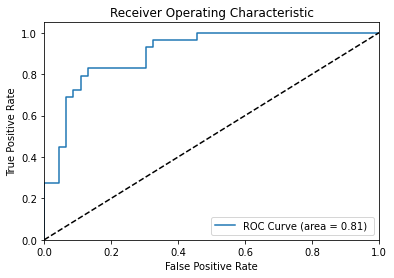

Logistic AUC = 0.81 


In [68]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f) ' % logistic_roc_auc) # 1-Specificity, Sensitivity
plt.plot([0,1],[0,1],'k--') # diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate") # 1-Specificity
plt.ylabel("True Positive Rate") # Sensitivity
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

print("Logistic AUC = %2.2f " % logistic_roc_auc )

# Accuracy

In [70]:
# compute the accuracy of our predictions
from sklearn.metrics import accuracy_score
print ("Logistic testing accuracy is ", accuracy_score(y_test, clf.predict(X_test)))

Logistic testing accuracy is  0.84


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Decision Tree

[Text(0.4105718085106383, 0.9545454545454546, 'X[11] <= 73.5\ngini = 0.436\nsamples = 299\nvalue = [203, 96]'),
 Text(0.11702127659574468, 0.8636363636363636, 'X[8] <= 136.5\ngini = 0.284\nsamples = 76\nvalue = [13, 63]'),
 Text(0.0425531914893617, 0.7727272727272727, 'X[4] <= 47.5\ngini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(0.02127659574468085, 0.6818181818181818, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.06382978723404255, 0.6818181818181818, 'X[1] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.0425531914893617, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.0851063829787234, 0.5909090909090909, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.19148936170212766, 0.7727272727272727, 'X[11] <= 48.5\ngini = 0.418\nsamples = 37\nvalue = [11, 26]'),
 Text(0.14893617021276595, 0.6818181818181818, 'X[2] <= 85.5\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.1276595744680851, 0.5909090909090909, 'gini = 0.0\nsamples = 2

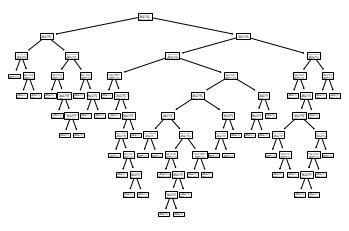

In [77]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
tree.plot_tree(dtree)

In [78]:
dtree_pred = dtree.predict(X_test)

In [80]:
accu = accuracy_score(y_test, dtree_pred)

In [81]:
print("Decision tree model accuracy (in %):", accu*100)

Decision tree model accuracy (in %): 100.0


from above we can see that descision tree can provide overfitting model we can over come this problem by pruning